**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024

## Uranium Mill Network Dynamics Simulation

### Coupled Solvent Extraction and Precipitation Module

In [1]:
'''Set up White Mesa Plant'''
from cortix import Cortix
from cortix import Network
from cortix import Units as unit
white_mesa = Cortix(use_mpi=False, splash=True)
wm_net = white_mesa.network = Network()

[12968] 2024-11-18 12:36:58,955 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

In [2]:
'''Setup Solvent Extraction'''
import src.solvex
solvex = src.solvex.Solvex()
wm_net.module(solvex)

In [3]:
'''Setup Precipitation'''
import src.precipitation
precip = src.precipitation.Precipitation()
wm_net.module(precip)

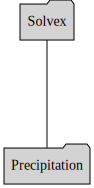

In [4]:
'''Setup Network'''
wm_net.connect([solvex, 'product'],[precip, 'uts-feed'])

wm_net.draw(engine='dot', node_shape='folder', size='600,1200')

In [5]:
'''Initialize run'''
end_time = 10*unit.day
time_step = 1.0*unit.day
show_time = (True, unit.hour)

for m in wm_net.modules:
    m.end_time = end_time
    m.time_step = time_step
    m.show_time = show_time

In [6]:
'''Run Whire Mesa and shutdown'''
white_mesa.run()
white_mesa.close()

[12968] 2024-11-18 12:37:03,461 - cortix - INFO - Launching Module <src.solvex.Solvex object at 0x000001686319C350>
[12968] 2024-11-18 12:37:03,585 - cortix - INFO - Launching Module <src.precipitation.Precipitation object at 0x000001686C49CB50>
[12968] 2024-11-18 12:37:05,992 - cortix - WARNING - Network::run(): not all modules reloaded from disk.                              # modules = 2; # files = 1
[12968] 2024-11-18 12:37:05,993 - cortix - INFO - run()::Elapsed wall clock time [s]: 7.04
[12968] 2024-11-18 12:37:05,994 - cortix - INFO - Closed Cortix object.
_____________________________________________________________________________
                           T E R M I N A T I N G                             
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %

In [7]:
'''Recover modules data'''
solvex = wm_net.modules[0]
precip = wm_net.modules[1]

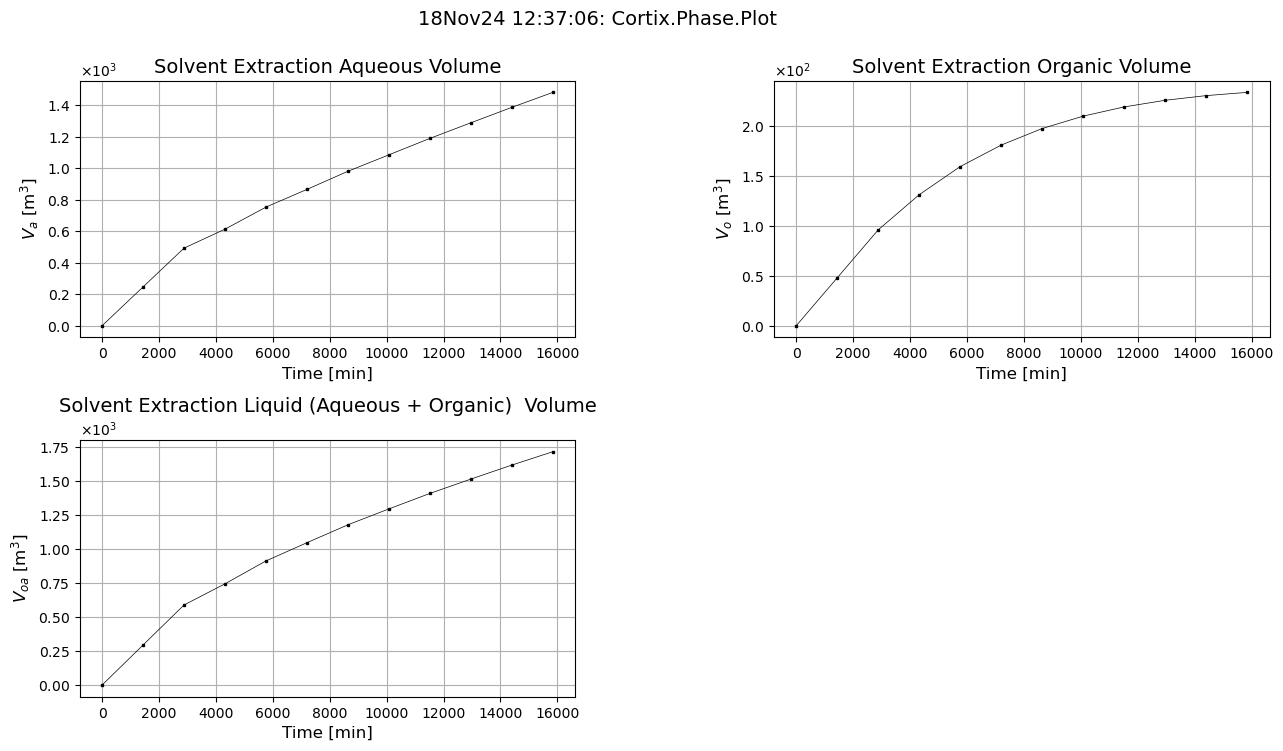

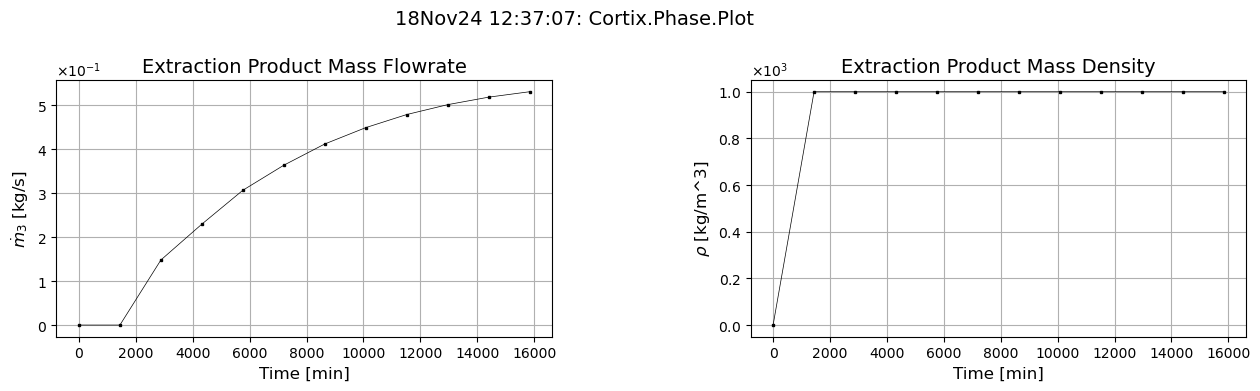

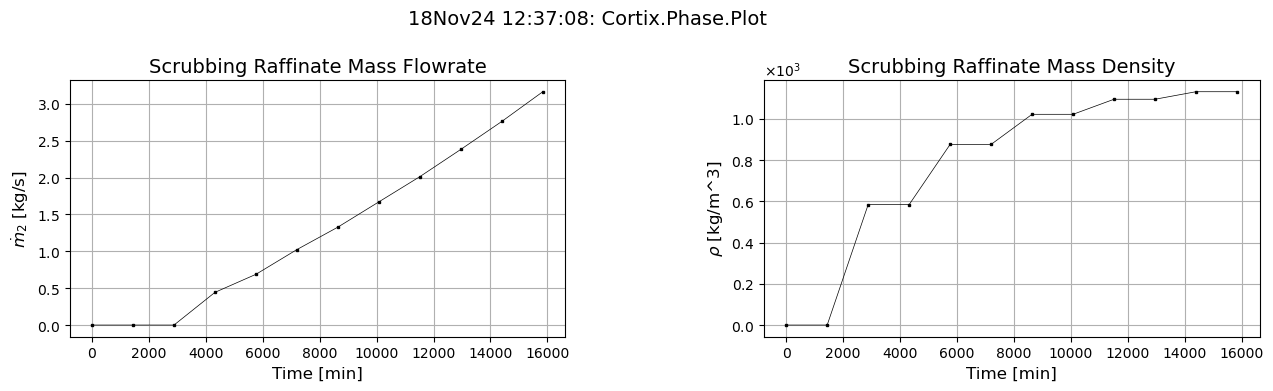

In [8]:
'''Solvex data'''
solvex.solvex_state_phase.plot(['aqueous-volume', 'organic-volume', 'liquid-volume'], show=True,figsize=[14,8])
solvex.solvex_product_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])
solvex.scrub_raffinate_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])

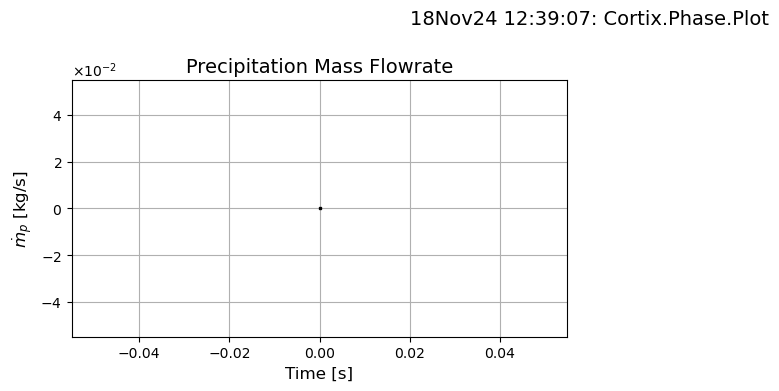

In [11]:
'''Precip data'''
precip.precipitation_phase.plot(['mass-flowrate'], show=True, figsize=[14, 8])